In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from src.classes import TankProperties32x2
from src.dataprocessing import (
    get_BallAnomaly_properties,
    get_measured_potential,
    get_permarray_FF,
    get_pot_data_FF,
    get_sample,
)
from src.functions import create_mesh, set_perm
from src.visualization import plot_mesh

## Show single measurement

In [2]:
l_path = "measurements/acryl_skip_8_d_30/"

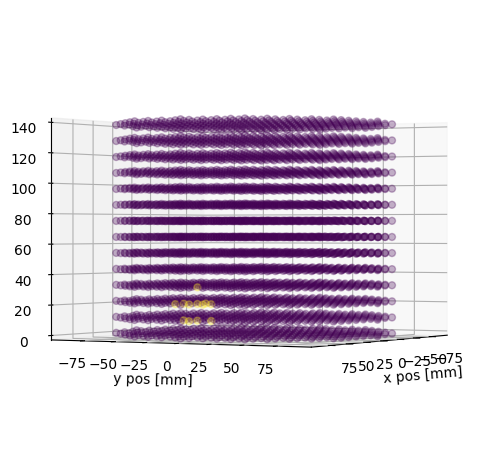

In [3]:
tmp, _ = get_sample(l_path, 17)

tank = tmp["tank"].tolist()
anomaly = get_BallAnomaly_properties(tmp)

mesh_obj = create_mesh(TankProperties32x2())
mesh_obj = set_perm(mesh_obj, anomaly)

plot_mesh(mesh_obj, elev=0)

## Load object cloud representation and potential data for ML

In [4]:
from sklearn.model_selection import train_test_split

from src.ML_example import init_train_data

In [5]:
idx = 0
# load all data
tmp_perm_array = get_permarray_FF(l_path, idx) / 15
tmp_pot_data = get_pot_data_FF(l_path, idx)

In [6]:
Perms, Pots = init_train_data(l_path)

In [7]:
print(Perms.shape, Pots.shape)

(75, 3542) (75, 4096)


In [13]:
Perms_train, Perms_test, Pots_train, Pots_test = train_test_split(
    Perms, Pots, random_state=42
)
print(Perms_train.shape, Perms_test.shape, Pots_train.shape, Pots_test.shape)

(56, 3542) (19, 3542) (56, 4096) (19, 4096)


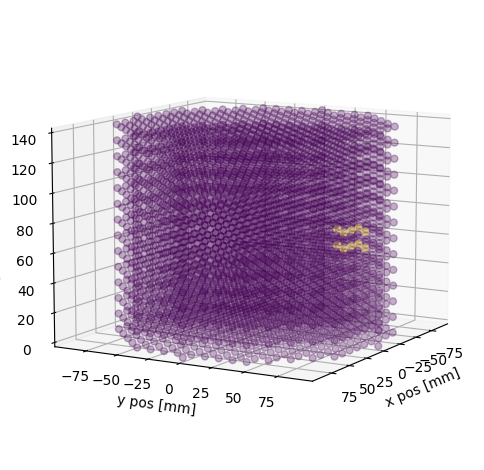

In [14]:
mesh_obj.perm_array = Perms_train[0, :]
plot_mesh(mesh_obj)